# Project Name: Predict the possibility of cardiovascular disease
### Team: Shreeya Gadre , Rachit Verma

### Introduction

Cardiovascular disease refers to narrowing of blood vessels leading to heart attack, chest pain or stroke. Major cardiovascular disease are life threatning and therefore it is important to learn about risk factors.Our Project studies different risk factors and how these factors affects the possibility of cardiovascular disease.


### Dataset
For this Project,We have taken Cardiovascular Disease dataset from Kaggle.
The dataset is publically available and downdloadable from https://www.kaggle.com/sulianova/cardiovascular-disease-dataset . 

The dataset consist of 12 feature and approx 70000 records.

There are 3 types of input features:

1. Objective: factual information;
2. Examination: results of medical examination;
3. Subjective: information given by the patient.

Analyzing Kaggle’s dataset to predict the possibility of cardiovascular disease based on several other factors in a dataset.
The data set is easy to understand.However, the meaning of some of the column headers are not obvious. 
Here's what they mean:

age : Objective feature|in days

gender : Objective feature|1- women , 2-men

height : Objective feature|in cm

weight : Objective feature|in Kg

ap_hi : Systolic blood pressure | Examination Feature | int 

ap_lo : Diastolic blood pressure | Examination Feature | int 

cholesterol: Examination Feature | 1: normal, 2: above normal, 3: well above normal 

gluc : Glucose| Examination Feature |1: normal, 2: above normal, 3: well above normal 

smoke : Smoking|Subjective Feature |binary 

alco :  Alcohol intake | Subjective Feature | binary 

active : Physical activity | Subjective Feature | binary 

cardio : Presence or absence of cardiovascular disease | Target Variable |binary






In [1]:
#Importing all Libraries

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#Reading dataset. 

dataframe = pd.read_csv('C:/Users/shree/Desktop/Analytics System Technology/Final Project/Data_Cardio.csv')
dataframe.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Data Description

In [3]:
#Identifying columns
dataframe.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [4]:
#Droping column "ID" as it is not significant for our data analysis
df = dataframe.drop(columns = ['id'])
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
#Shape of data set
df.shape

(70000, 12)

In [6]:
#information of data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


The above set of information showcase following things:

1. Column names are consistent.
2. For each column , there are 70000 records, this shows that rows are consistent.

In [7]:
# Finding out Summary Statistics of dataset to know more about features of dataset.

df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## Data Cleaning

In [8]:
#Detecting Missing Values

df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [9]:
#detecting any NA or NAN or inconsitent value.

df.isna().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

The above code showcase there is no missing values or NA values. Data is consistent and clean so there is no need of cleaning.

## Exploratory Data Analysis

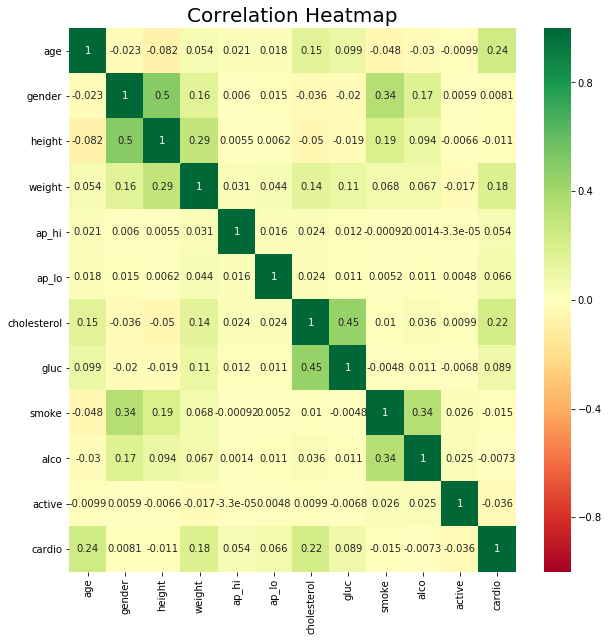

In [10]:
#Correlation Heatmap

plt.figure(figsize=(10,10))
corr = df.corr()
corr.index = df.columns
sns.heatmap(corr, annot = True, cmap='RdYlGn', vmin=-1, vmax=1)
plt.title("Correlation Heatmap", fontsize=20)
plt.show()   

By analyzing above graph, we can say that age,weight,cholesterol,gluc are more correlated to cardio variable compared to other factors.

### Finding:

Below four factors have impact on target variable: cardio

1. age
2. weight
3. cholesterol
4. gluc

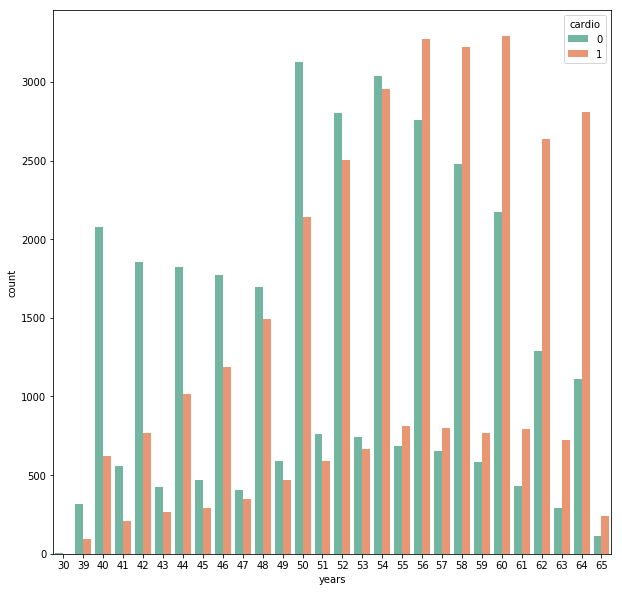

In [11]:
#Countplot for age in terms of year

from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 10
df['years'] = (df['age'] / 365).round().astype('int')
sns.countplot(x='years', hue='cardio', data = df, palette="Set2")


With increase in age, the risk of geeting cardiovascular disease increases. From above graph , we can see that people from age group 55-65 are more prone to cardiovascular diseases.

### Finding: 
age has effect on cardio variable(taget).

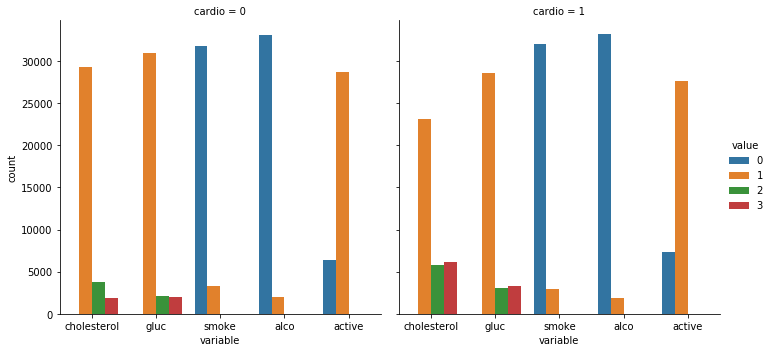

In [12]:
#Count Plot for Categorical variable cholesterol,gluc,smoke,alco,active

df_categorical = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value", col="cardio",data=df_categorical, kind="count")

The above visulization showcase the counts of different categorical variable in terms of cardio variable.

### Finding:

1. With more level of cholestrol and gluc, the possibility of cardiovascular disease increase.
2. Distribution of smoke and alco for cardio variable 0 and 1. This shows alco and smoke doesn't have much effect on cardio target variable.
3. Lesser the physical activiy, more prone to cardiovascular disease but the difference is not much significant. This shows we can ignore active variable while considering it's effect on cardio variable. 

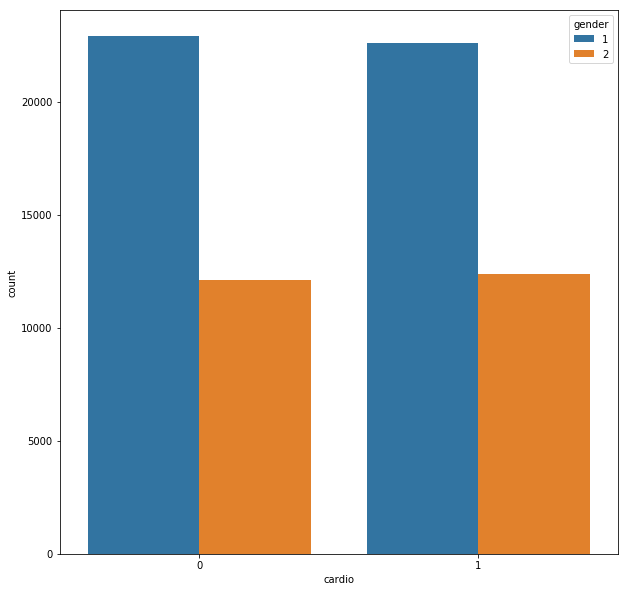

In [13]:
# visualize cardio with gender
sns.countplot(x='cardio',data=df,hue='gender')

The above visulization showcase the counts of different gender in terms of cardio variable.The distribution of values for cardio variable 0 and cardio variable 1 is similar and doesn't showcase any trend.This shows gender has not much effect on cardio vascular disease.

## Finding:
gender has no significant effect on cardio target variable.

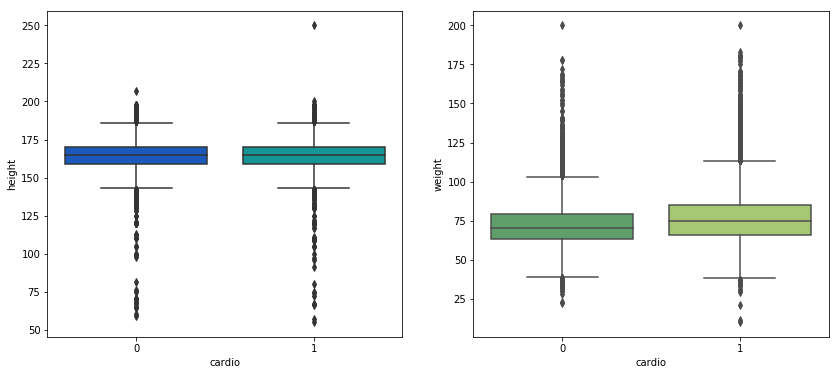

In [14]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(x='cardio',y='height',data=df,palette='winter')
plt.subplot(1,2,2)
sns.boxplot(x='cardio',y='weight',data=df,palette='summer')

The above visualization showcase distribution of height and weight in respect with cardio target variable.
For height, the distribution is similar for both cardio value 0 and cardio value 1. 
For weight, the of values weight distribution for cardio variable 1 is more than cardio variabl 0. This means,more the weight of the person , more is the possibility of cardiovascular disease. 

### Finding:
1. height has no significant effect on cardio target variable.
2. weight has effect on cardio target variable. 

C:\Users\shree\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


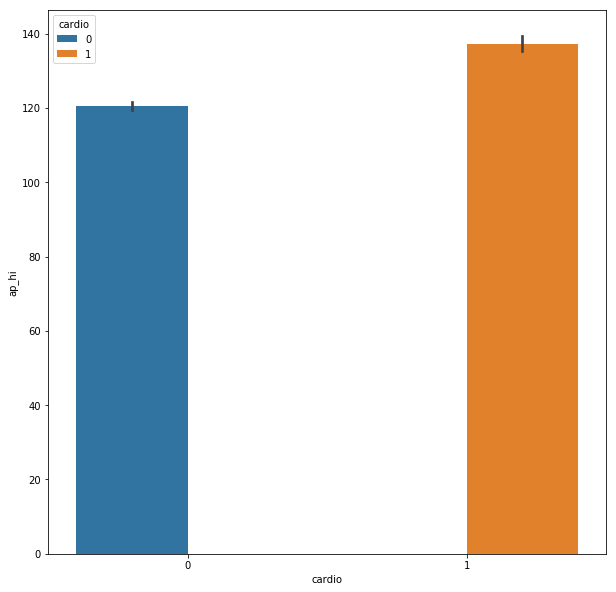

In [15]:
plt.figure(figsize=(10,10))

sns.barplot(x='cardio',y='ap_hi',hue='cardio',data=df)


The above visulation showcase when systolic blood pressure is high, then there is more possibility of cardio vascular disease.

### Finding

ap_hi (Systolic blood pressure) has effect on cardio variable targetvariable. 

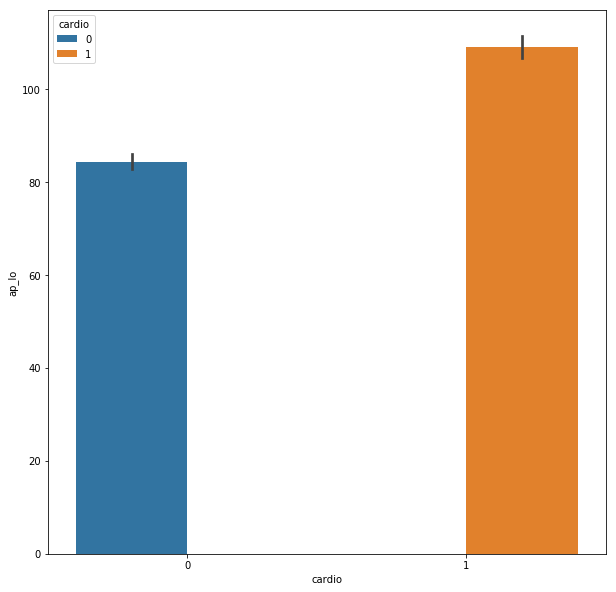

In [16]:
plt.figure(figsize=(10,10))

sns.barplot(x='cardio',y='ap_lo',hue='cardio',data=df)

The above visulation showcase when diastolic blood pressure is high, then there is more possibility of cardio vascular disease.

### Finding

ap_lo (diastolic blood pressure) has effect on cardio variable target variable. 

## Variable Selection

With Exploratory data analysis, we have found that below factors has major effect on cardio vascular disease.

1. age          (more the age  , more prone to cardiovascular disease)
2. weight       (higher the weight , more prone to cardiovascular disease)
3. ap_hi        (higher the systolic blood pressure , more prone to cardiovascular disease)
4. ap_lo        (higher the diastolic blood pressure , more prone to cardiovascular disease)
5. cholesterol  (higher the cholesterol , more prone to cardiovascular disease)
6. gluc         (higher the glucose level in body , more prone to cardiovascular disease)


## Training and Testing Data

In [17]:
# X: create from df with all the columns except the last column (cardio)
X = df[['age','weight','ap_hi','ap_lo','cholesterol','gluc']]
X.head()


,age,weight,ap_hi,ap_lo,cholesterol,gluc
0,18393,62.0,110,80,1,1
1,20228,85.0,140,90,3,1
2,18857,64.0,130,70,3,1
3,17623,82.0,150,100,1,1
4,17474,56.0,100,60,1,1


In [18]:
# y: create from the last target variable column (cardio) in df
y = df[['cardio']]
y.head()

,cardio
0,0
1,1
2,1
3,1
4,0


In [19]:
#Create Training and Testing data: X_train, X_test, y_train, y_test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [20]:
# print out the shape of X_train, y_train, 

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

# print out the shape of X_test, X_test, 

print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (52500, 6)
y_train shape: (52500, 1)
X_test shape: (17500, 6)
y_test shape: (17500, 1)


### Building Model

In [21]:
#Importing Accuracy Score
from sklearn.metrics import accuracy_score

#List of model predicted values
Models = list()
Models

[]



###  Model:Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier 

# Build A Random Forest Model
RanFor=RandomForestClassifier()

# Train the model
RanFor.fit(X_train, y_train)

#Predict outcome on testing dataset, assign prediction outcome to y_pred

y_pred_RanFor = RanFor.predict(X_test) 

Models.append(y_pred_RanFor)

#accuracy score
accuracy_score(y_test,y_pred_RanFor)



C:\Users\shree\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\shree\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


0.6806285714285715

### Model: Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

#Build a Logistic regression
LR=LogisticRegression()

# Train the model
LR.fit(X_train, y_train)

#Predict outcome on testing dataset, assign prediction outcome to y_pred

y_pred_LR = LR.predict(X_test) 

Models.append(y_pred_LR)

#accuracy score
accuracy_score(y_test,y_pred_LR)



C:\Users\shree\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shree\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7206857142857143

### Model: Decision Tree

In [24]:
# Import decision tree
from sklearn.tree import DecisionTreeClassifier

# Build a decision tree model
dtree=DecisionTreeClassifier()

# Train the model
dtree.fit(X_train, y_train)

#Predicting ourtcome on dataset

y_pred_dtree = dtree.predict(X_test)

Models.append(y_pred_dtree)

#accuracy score
accuracy_score(y_test,y_pred_dtree)

0.6378285714285714

### Model: Gaussian Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB

#Build a Gaussian Naive Bayes model
GNB = GaussianNB()

#Train a model
GNB.fit(X_train, y_train) 

#Predicting outcome on dataset
y_pred_NB = GNB.predict(X_test)

Models.append(y_pred_NB)

#accuracy score
accuracy_score(y_test,y_pred_NB)


C:\Users\shree\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5907428571428571

### KNeighborsClassifier

In [26]:
from sklearn.neighbors import KNeighborsClassifier

#Build a KNeighborsClassifier
knn=KNeighborsClassifier()

#Train a Model
knn.fit(X_train, y_train)

#Predicting outcome on dataset
y_pred_KN = knn.predict(X_test)

Models.append(y_pred_KN)

#accuracy score
accuracy_score(y_test,y_pred_KN)


C:\Users\shree\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


0.6857714285714286

### Accuracy Score

In [27]:
Models

[array([0, 0, 1, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 1, 1], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 1], dtype=int64),
 array([0, 0, 0, ..., 0, 1, 1], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 1], dtype=int64)]

In [28]:
#Finding out accuracy of model

classifier = ['RandomForest' , 'LogisticRegression' ,'DecisionTree', 'Naive Bayes' , 'KNeighbors']
score=list()
a=0
index=0
from sklearn.metrics import accuracy_score
for pred in range(len(Models)):
    if a < accuracy_score(y_test,Models[pred]):
        a = accuracy_score(y_test,Models[pred])
        index=pred
    print("accuracy of {} Models is {:.2f}%".format(classifier[pred],accuracy_score(y_test,Models[pred])*100))
    
print("\nBest Classifier Model is {} and the accuracy is {:.2f}%".format(classifier[index],a*100))


accuracy of RandomForest Models is 68.06%
accuracy of LogisticRegression Models is 72.07%
accuracy of DecisionTree Models is 63.78%
accuracy of Naive Bayes Models is 59.07%
accuracy of KNeighbors Models is 68.58%

Best Classifier Model is LogisticRegression and the accuracy is 72.07%


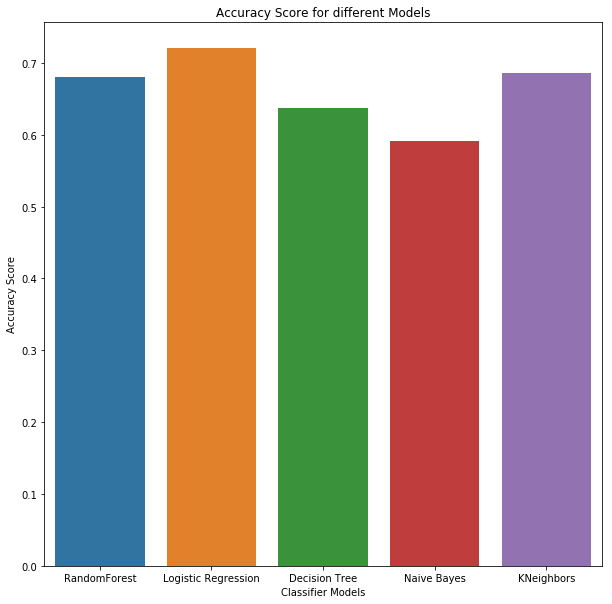

In [29]:
x = ["RandomForest","Logistic Regression","Decision Tree","Naive Bayes","KNeighbors"]
y = np.array([accuracy_score(y_test, y_pred_RanFor),accuracy_score(y_test, y_pred_LR),accuracy_score(y_test,y_pred_dtree),
             accuracy_score(y_test,y_pred_NB),accuracy_score(y_test,y_pred_KN)])
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x,y)
plt.ylabel("Accuracy Score")
plt.xlabel("Classifier Models")
plt.title("Accuracy Score for different Models")
plt.show()

## Conclusion

The best fitted model for predicting cardiovascular disease is: "Logistic Regression"
